## Importing Libraries and MNIST dataset

In [1]:

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

### Preprocessing

In [3]:
def scale_mnist_data(train_images, test_images):
    """
    This function takes in the training and test images as loaded in the cell above, and scales them
    so that they have minimum and maximum values equal to 0 and 1 respectively.
    Your function should return a tuple (train_images, test_images) of scaled training and test images.
    """
    train_images=train_images/255
    test_images=test_images/255
    return (train_images,test_images)

In [4]:
scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

In [5]:
scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

## Building a Convolution Neural Network

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPooling2D

In [7]:
def get_model(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    
    model=Sequential([
        Conv2D(8,kernel_size=(3,3),padding='SAME',activation='relu',input_shape=(28,28,1)),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(64,activation='relu'),
        Dense(10,activation='softmax')
    ])
    return model

In [8]:
model = get_model(scaled_train_images[0].shape)

In [9]:
def compile_model(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with default settings), the cross-entropy loss function and
    accuracy as the only metric. 
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

In [10]:
compile_model(model)

In [11]:
def train_model(model, scaled_train_images, train_labels):
    """
    This function should train the model for 5 epochs on the scaled_train_images and train_labels. 
    Your function should return the training history, as returned by model.fit.
    """
    batch_size = 128
    num_epoch = 5
    history=model.fit(scaled_train_images, train_labels,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1)
       #   validation_data=(test_images, test_labels))
    
    return history

In [12]:
history = train_model(model, scaled_train_images, train_labels)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 16s 272us/sample - loss: 0.3420 - accuracy: 0.9039- loss: 0.3445 - accuracy: 
Epoch 2/5
60000/60000 [==============================] - 14s 232us/sample - loss: 0.1270 - accuracy: 0.9626- loss: 0.1297 - accu
Epoch 3/5
60000/60000 [==============================] - 15s 242us/sample - loss: 0.0865 - accuracy: 0.9746
Epoch 4/5
60000/60000 [==============================] - 13s 213us/sample - loss: 0.0674 - accuracy: 0.9805
Epoch 5/5
60000/60000 [==============================] - 14s 232us/sample - loss: 0.0561 - accuracy: 0.9830


In [13]:
frame = pd.DataFrame(history.history)

## Plots

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

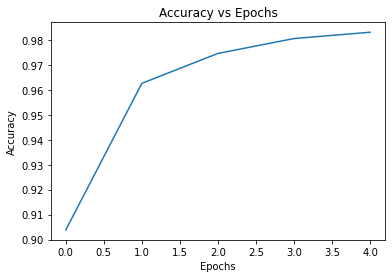

In [14]:
acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

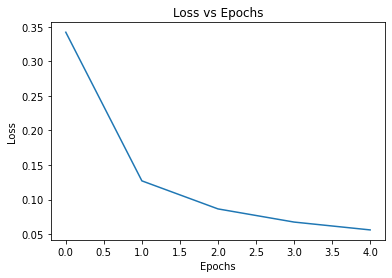

In [15]:
acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

In [16]:
def evaluate_model(model, scaled_test_images, test_labels):
    """
    This function should evaluate the model on the scaled_test_images and test_labels. 
    Your function should return a tuple (test_loss, test_accuracy).
    """
    loss,accuracy=model.evaluate(scaled_test_images, test_labels,verbose=2)
    return (loss,accuracy)
    

In [17]:
test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

10000/10000 - 3s - loss: 0.0622 - accuracy: 0.9800
Test loss: 0.06221009950283915
Test accuracy: 0.9800000190734863


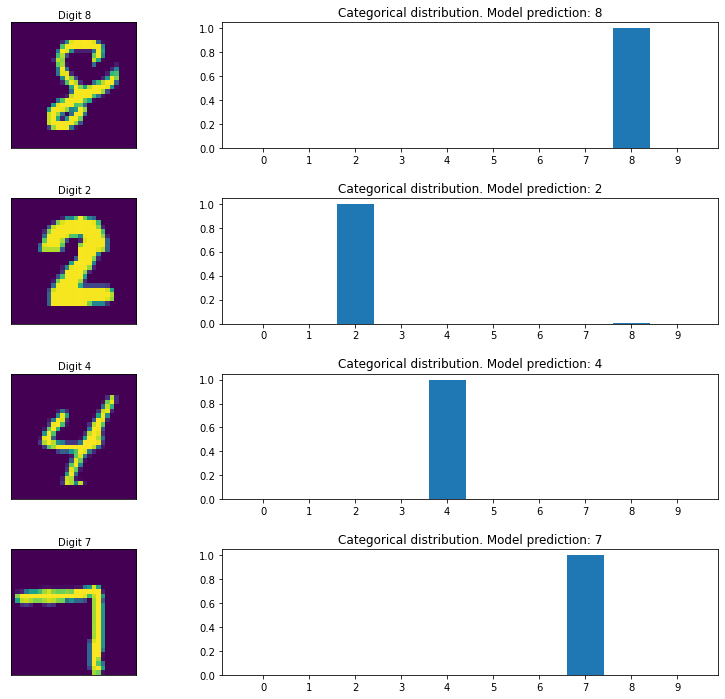

In [18]:
num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()